# Nueral Network Example with 'pima-indians-diabetes.csv'

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction = Diabetes pedigree function

Age = Age (years)

Outcome = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

### Neural Network with 3 hidden layer

Sequential model with 'relu' and 'sigmoid' function.

### Accuracy of model is 77%

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense

In [2]:
#assigning columns name
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

#reading csv file into dataframe
df = pd.read_csv('pima-indians-diabetes.csv', delimiter=',',names=columns)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info() #info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe() #numerical data description

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Value for cols 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' cannot be zero.

In [5]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [6]:
for i in cols:
    median_value = df[i].median()
    df[i] = df[i].replace(0,median_value) #ASsigning median value to value with zero
    
    #Another way to fill median values
    #df[i].fillna(median_value, inplace=True)
    #print(median_value)

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis

<AxesSubplot:>

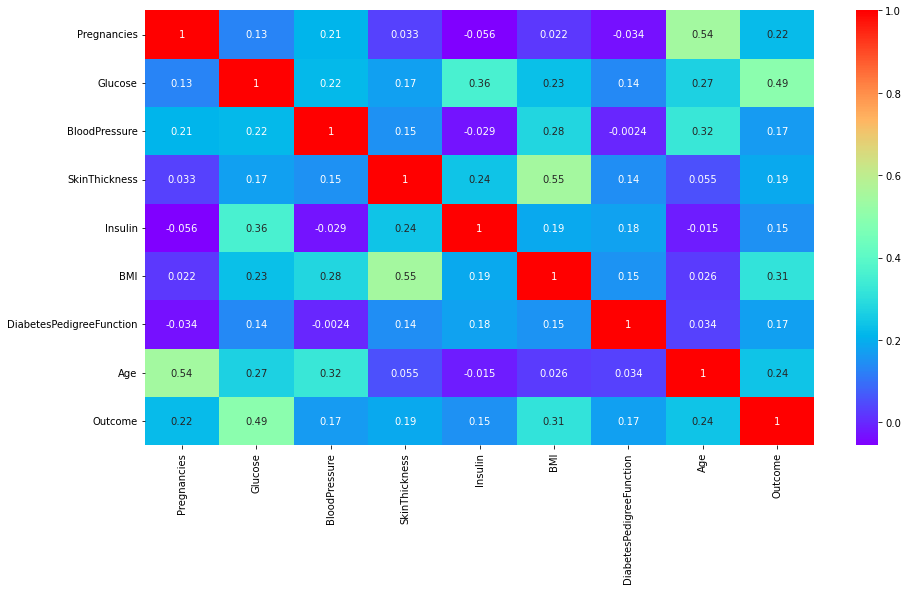

In [9]:
#Showing correlation among all.
plt.subplots(figsize=(15,8))

sns.heatmap(df.corr(),annot=True,cmap='rainbow')

Glucose has highest corelation with Outcome.

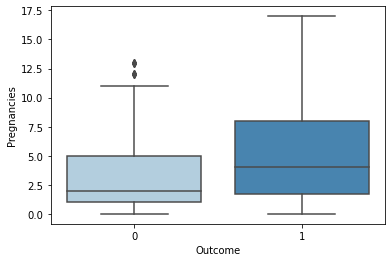

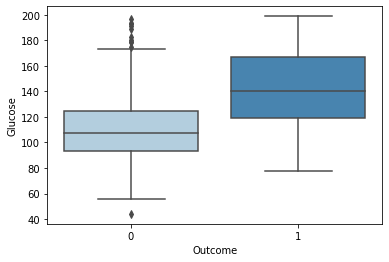

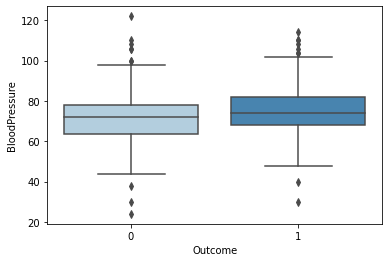

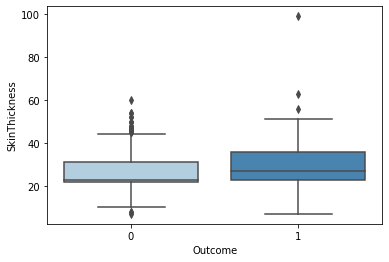

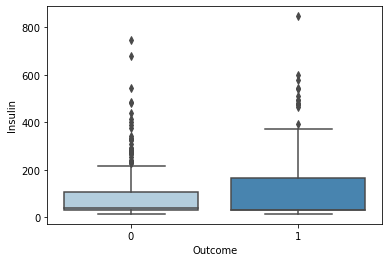

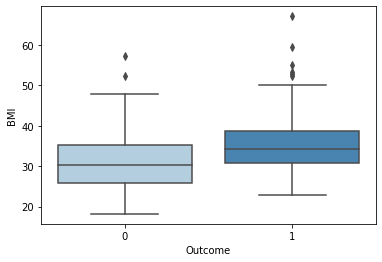

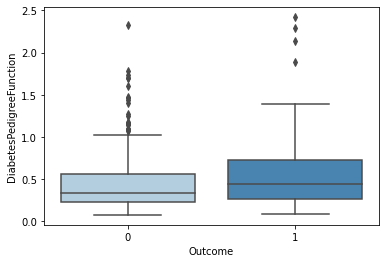

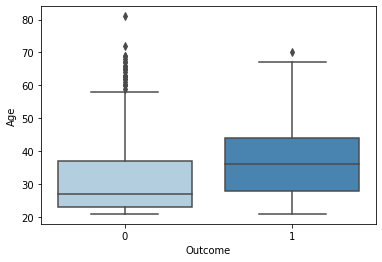

In [10]:
#Box plots of all coulmns with outomce columns
def boxplot(df: pd.DataFrame) -> None:
    
#Visualize a boxplot for each feature for each class.

    fig, axis = plt.subplots()

    for col in df.columns:
        if col != 'Outcome':
            sns.boxplot(x='Outcome', y=col, data=df, palette='Blues')
            plt.show()
            

boxplot(df=df)

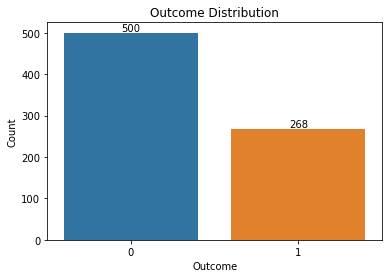

In [11]:
# Outcome Distribution
ax = sns.countplot(data=df, x='Outcome')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Add labels and title to the plot
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Distribution')

# Display the plot
plt.show()

In this dataset there are total 268 people who tested positive out of 768 people.

# Feature Engineering

In [12]:
# Specify the column names to be scaled
columns_to_scale = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling to the specified columns
# Bring all values between 0 and 1 
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.501008,0.493742,0.221029,0.096938,0.291430,0.168179,0.204015,0.348958
std,3.369578,0.196376,0.123435,0.100315,0.126860,0.140601,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.359677,0.408163,0.173913,0.019832,0.190184,0.070773,0.050000,0.000000
50%,3.000000,0.470968,0.489796,0.173913,0.020733,0.282209,0.125747,0.133333,0.000000
75%,6.000000,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

#Train Test split Model

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [15]:
# define the keras model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
54/54 [==============================] - 1s 2ms/step - loss: 0.7412 - accuracy: 0.4935
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6574
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6592
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6592
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6611
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.6536
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.6592
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.6723
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.6611
Epoch 10/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.6760
Epoch 11/

In [16]:
loss, accuracy = model.evaluate(X_train, y_train)

17/17 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.7858


In [17]:
print('Loss: %.2f' % (loss*100))
print('Accuracy: %.2f' % (accuracy*100))

Loss: 44.06
Accuracy: 78.58


In [18]:
y_pred = model.predict(X_test) #predicting the model
threshold = 0.5
y_pred = (y_pred > threshold).astype(int) #converting to 0,1

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

print("Accuracy: ", (accuracy*100))

Mean Squared Error (MSE): 0.23376623376623376
Mean Absolute Error (MAE): 0.23376623376623376
Accuracy:  76.62337662337663


In [20]:
from sklearn.metrics import confusion_matrix
# Calculate various evaluation metrics

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[128  18]
 [ 36  49]]
